# Multiple Linear Regression : Bike Sharing Assignment

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

- In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- The company wants to know: Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal

- We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Reading and Understanding the Data

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(730, 16)

In [9]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### FINDINGS
- Dataset has 730 rows and 16 columns.
- "dteday" column is object and rest columns are float or integer.
- The data does not contain any null values or duplicated values.
- Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

## Removing redundant & unwanted columns

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

- instant : Its only an index value

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

- We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [14]:
data1 = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

## Creating Dummy Variables

- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

- Before creating dummy variables, we will have to convert them into 'category' data types.

In [17]:
# # Convert to 'category' data type
data1["season"] = data1["season"].astype("category")
data1["weathersit"] = data1["weathersit"].astype("category")
data1["mnth"] = data1["mnth"].astype("category")
data1["weekday"] = data1["weekday"].astype("category")

In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [20]:
data1 = pd.get_dummies(data1, drop_first=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
data1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
data1.shape

(730, 30)

## SPLITTING THE DATA
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [23]:
from sklearn.model_selection import train_test_split
## We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
data_train,data_test = train_test_split(data1, train_size=0.7, test_size=0.3, random_state=333)

In [24]:
data_train.shape

(510, 30)

In [25]:
data_test.shape

(219, 30)

## EXPLORATORY DATA ANALYSIS
- We need to perform the EDA on TRAINING (data_train) Dataset.

In [26]:
num = data1[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

<Axes: xlabel='windspeed', ylabel='cnt'>

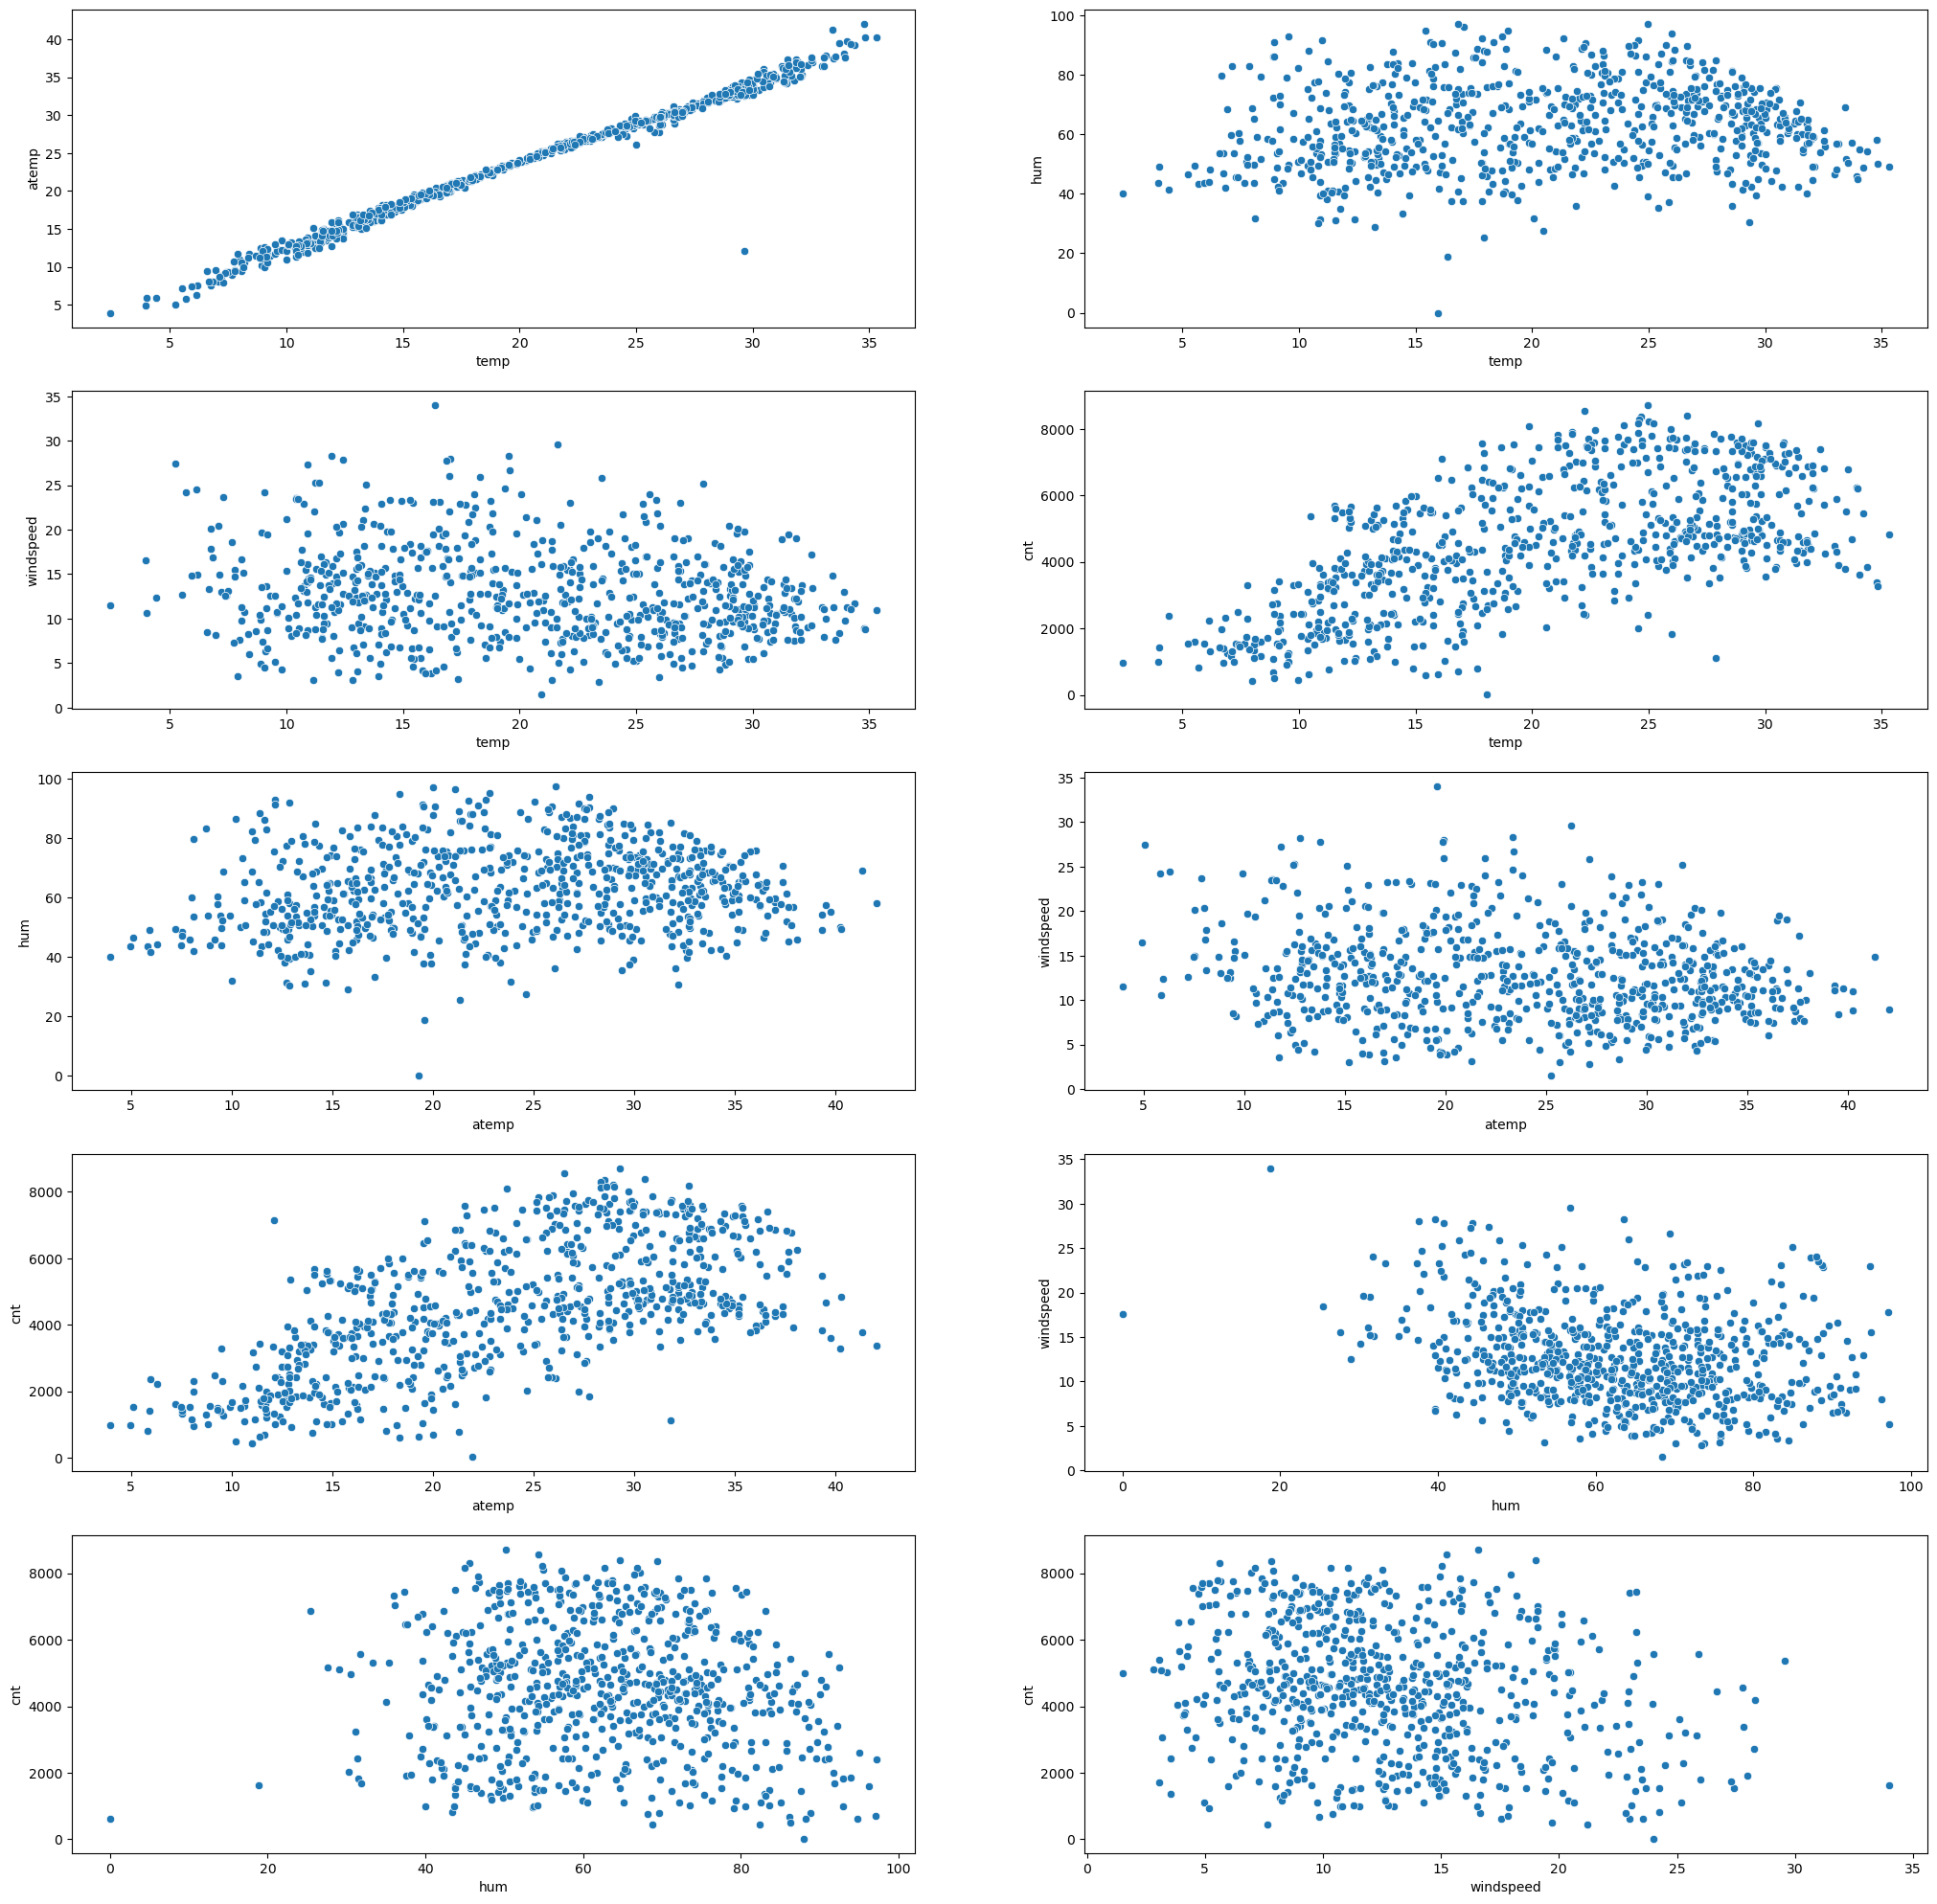

In [38]:
plt.figure(figsize=(25,25))
plt.subplot(5,2,1)
sns.scatterplot(data1, x="temp", y="atemp")
plt.subplot(5,2,2)
sns.scatterplot(data1, x="temp", y="hum")
plt.subplot(5,2,3)
sns.scatterplot(data1, x="temp", y="windspeed")
plt.subplot(5,2,4)
sns.scatterplot(data1, x="temp", y="cnt")
plt.subplot(5,2,5)
sns.scatterplot(data1, x="atemp", y="hum")
plt.subplot(5,2,6)
sns.scatterplot(data1, x="atemp", y="windspeed")
plt.subplot(5,2,7)
sns.scatterplot(data1, x="atemp", y="cnt")
plt.subplot(5,2,8)
sns.scatterplot(data1, x="hum", y="windspeed")
plt.subplot(5,2,9)
sns.scatterplot(data1, x="hum", y="cnt")
plt.subplot(5,2,10)
sns.scatterplot(data1, x="windspeed", y="cnt")

- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

- Visualizing categorical variables

<Axes: xlabel='workingday', ylabel='cnt'>

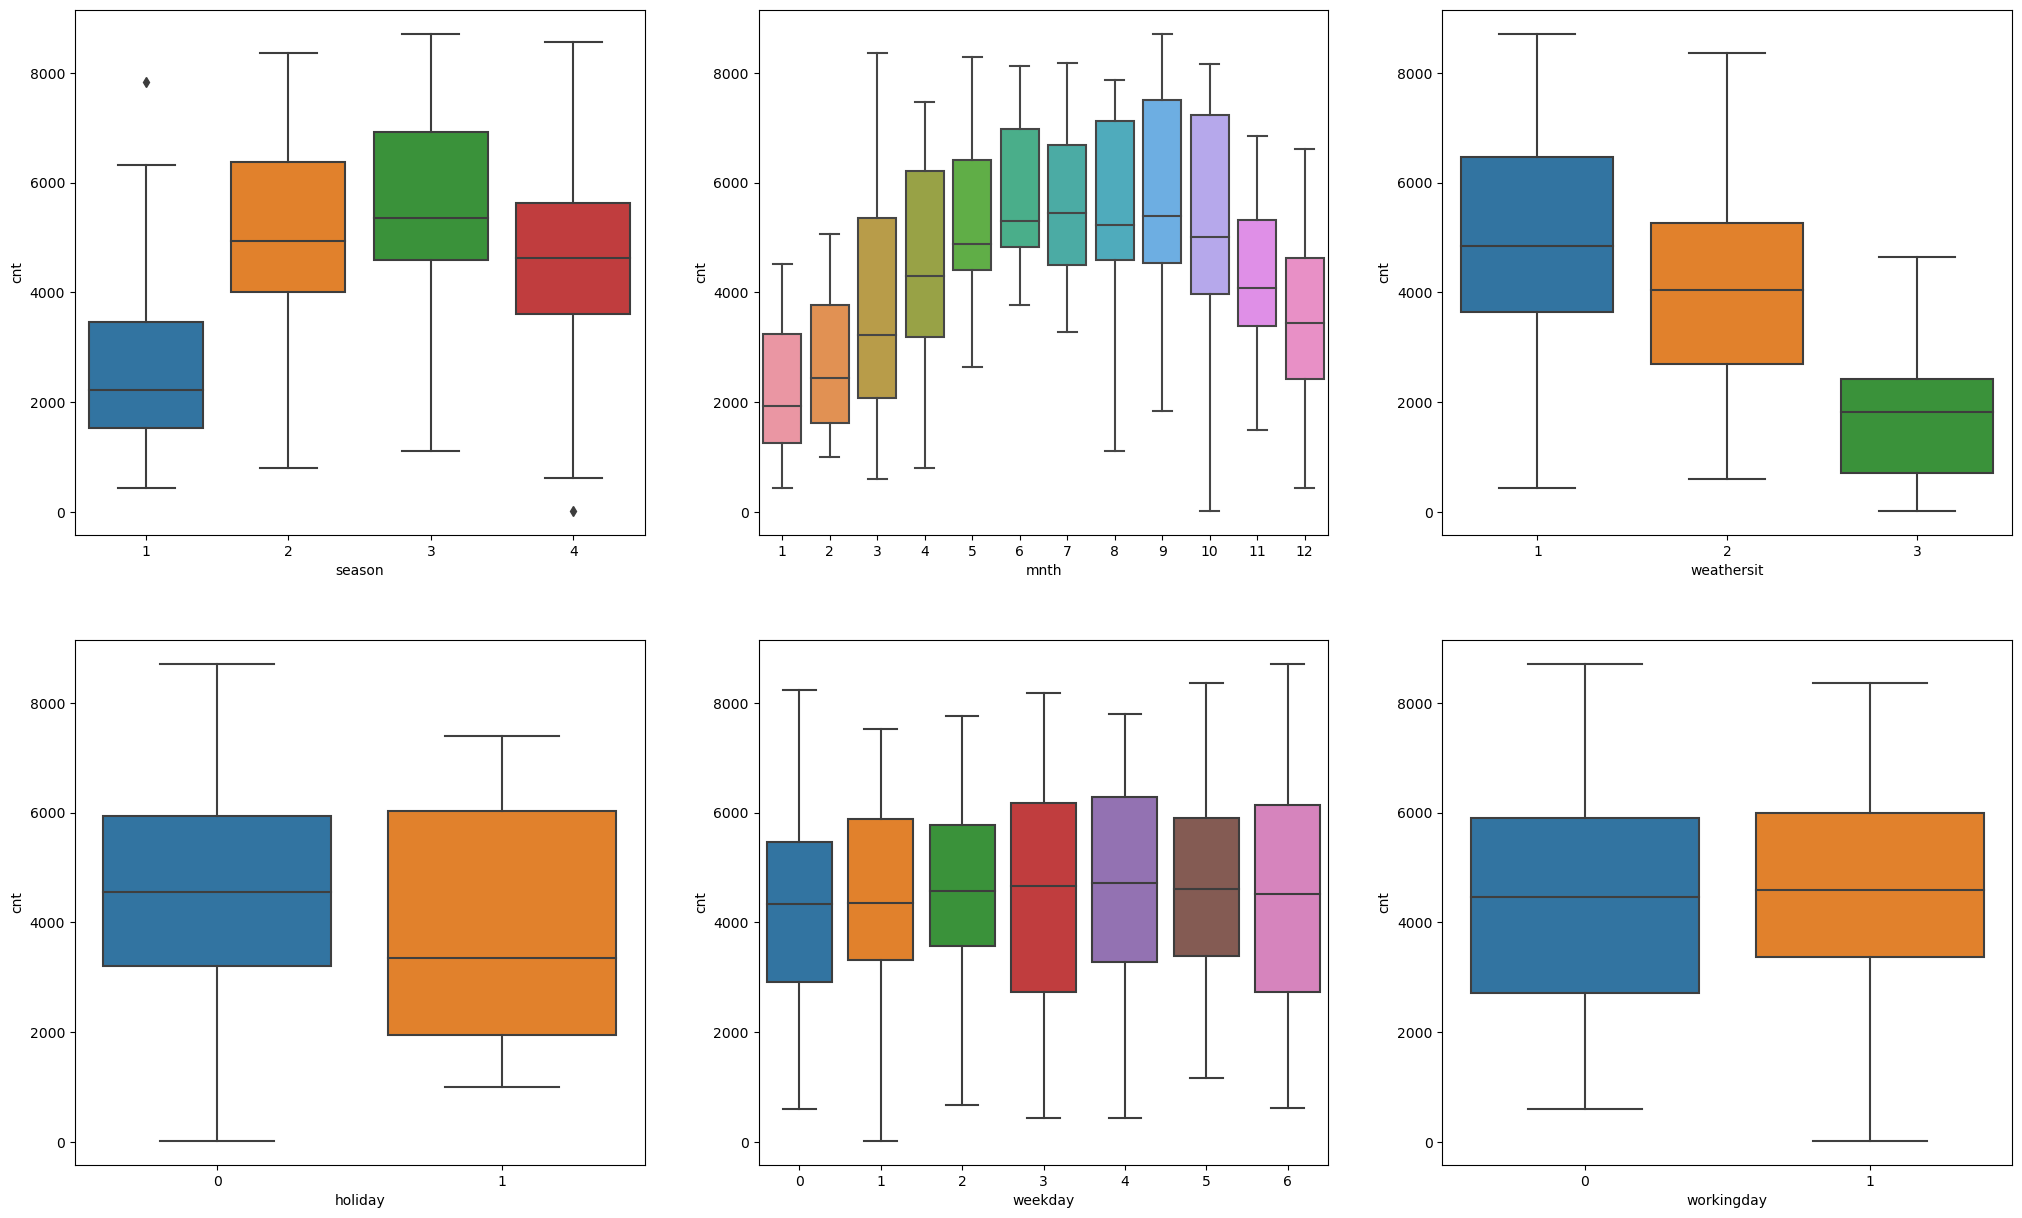

In [45]:
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
sns.boxplot(data, x="season",y="cnt")
plt.subplot(2,3,2)
sns.boxplot(data, x="mnth",y="cnt")
plt.subplot(2,3,3)
sns.boxplot(data, x="weathersit",y="cnt")
plt.subplot(2,3,4)
sns.boxplot(data, x="holiday",y="cnt")
plt.subplot(2,3,5)
sns.boxplot(data, x="weekday",y="cnt")
plt.subplot(2,3,6)
sns.boxplot(data, x="workingday",y="cnt")

### Insights
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

- season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
- holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.
- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

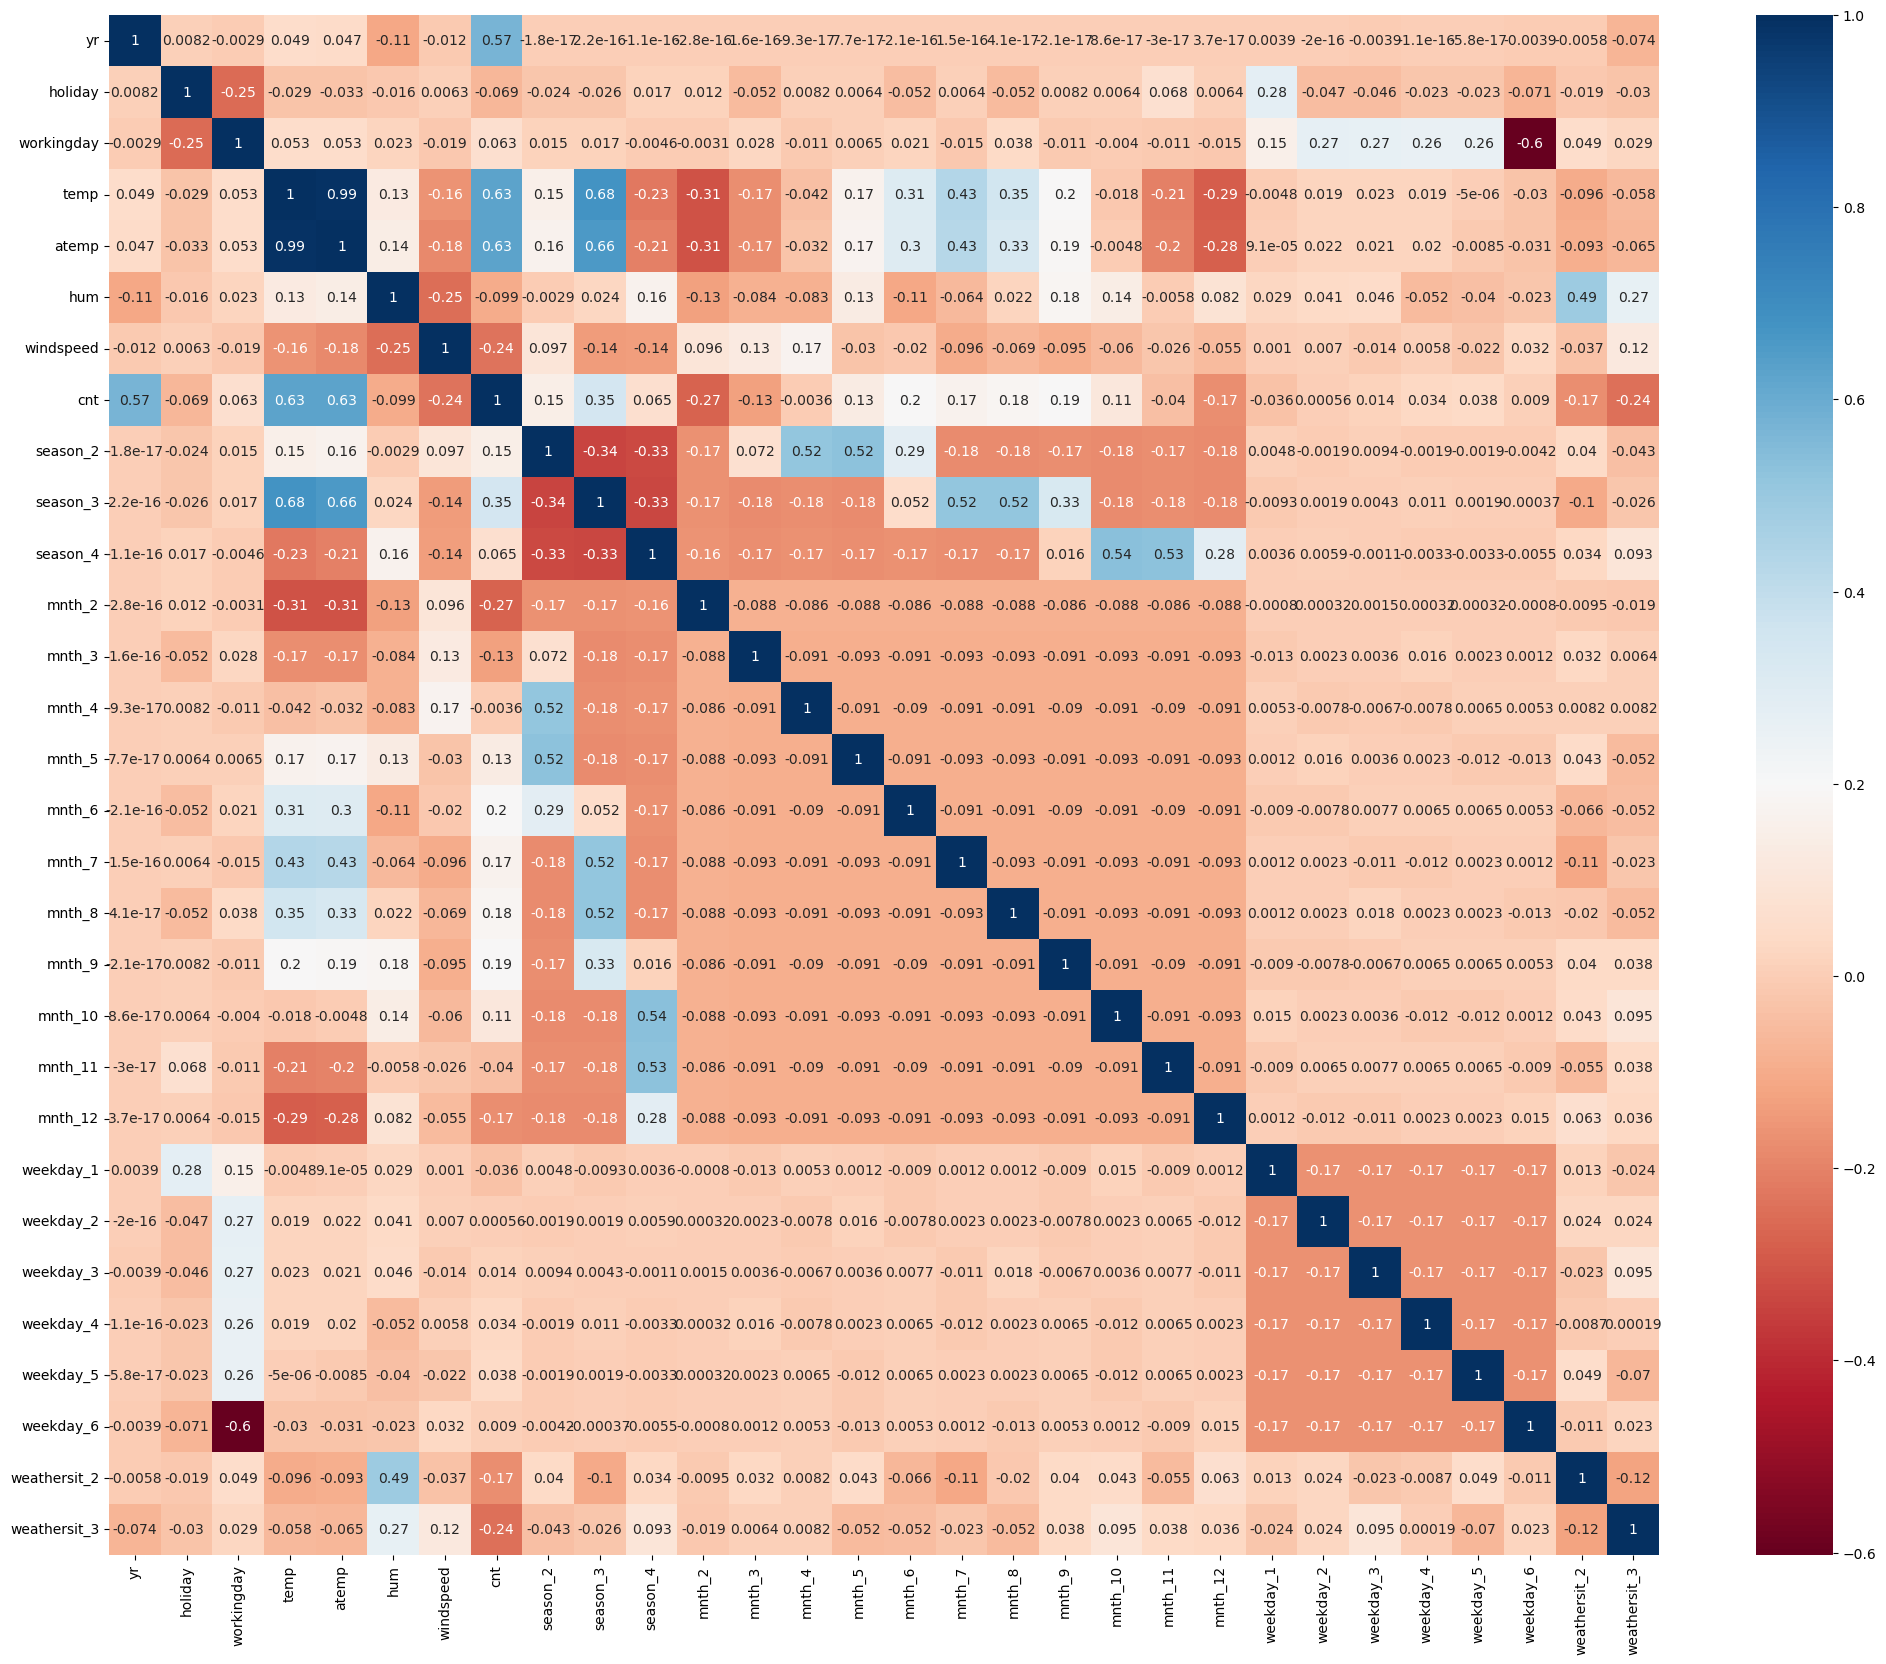

In [46]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.corr(), annot=True, cmap="RdBu")
plt.show()

Insights:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
num_var = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [52]:
data_train[num_var]= scaler.fit_transform(data_train[num_var])

In [55]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


# BUILDING LINEAR MODEL
### Dividing into x and y sets for model building

In [56]:
y_train = data_train.pop("cnt")
x_train = data_train

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [71]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 15),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 16),
 ('mnth_8', False, 6),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 7),
 ('weekday_2', False, 14),
 ('weekday_3', False, 12),
 ('weekday_4', False, 13),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [72]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [73]:
x_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

In [74]:
X_train_rfe = x_train[col]

# Building Linear Model using 'STATS MODEL'
## Model 1

In [78]:
# VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif["features"] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
1,temp,384.22
2,atemp,362.97
3,hum,15.71
6,season_3,7.09
4,windspeed,4.52
5,season_2,3.53
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
10,mnth_10,1.66


In [87]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [88]:
lr1.params

const           0.230868
yr              0.228761
temp            0.436873
atemp           0.057054
hum            -0.182768
windspeed      -0.188287
season_2        0.129543
season_3        0.079000
season_4        0.151737
mnth_3          0.048573
mnth_9          0.100896
mnth_10         0.054513
weekday_6       0.021925
weathersit_2   -0.045051
weathersit_3   -0.265209
dtype: float64

In [91]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          7.83e-185
Time:                        10:55:00   Log-Likelihood:                 502.27
No. Observations:                 510   AIC:                            -974.5
Df Residuals:                     495   BIC:                            -911.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2309      0.028      8.108   

## Model 2

- removing atemp as they have high vif value and high p-value.

In [92]:
X_train_2 = X_train_rfe.drop(["atemp"], axis=1)

In [95]:
# vif check

vif2 = pd.DataFrame()
vif2["features"] = X_train_2.columns
vif2["VIF"] = [variance_inflation_factor(X_train_2,i) for i in range(X_train_2.shape[1])]
vif2["VIF"] = round(vif2["VIF"],2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
1,temp,23.06
2,hum,15.39
5,season_3,7.00
3,windspeed,4.36
4,season_2,3.53
6,season_4,3.01
11,weathersit_2,2.13
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [103]:
X_train_lm2 = sm.add_constant(X_train_2)

lm2 = sm.OLS(y_train, X_train_lm2).fit()

In [104]:
lm2.params

const           0.231713
yr              0.228744
temp            0.490781
hum            -0.182205
windspeed      -0.190497
season_2        0.129663
season_3        0.078090
season_4        0.151987
mnth_3          0.048715
mnth_9          0.100907
mnth_10         0.054579
weekday_6       0.022021
weathersit_2   -0.045196
weathersit_3   -0.265563
dtype: float64

In [105]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          5.96e-186
Time:                        11:27:42   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     496   BIC:                            -917.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2317      0.028      8.166   

## Model 3

- removing "hum" as it has high vif
- Choosing to remove hum even though is has the second highest vif, based on knowledge the temp is more important for anlaysis.

In [102]:
X_train_3 = X_train_2.drop(["hum"],axis=1)

In [110]:
vif3 = pd.DataFrame()
vif3["features"]  = X_train_3.columns
vif3["VIF"] = [variance_inflation_factor(X_train_3,1) for i in range(X_train_3.shape[1])]
vif3["VIF"] = round(vif3["VIF"],2)
vif3 = vif3.sort_values(by="VIF",ascending=False)

In [123]:
X_train_lm3 = sm.add_constant(X_train_3)

lr3 = sm.OLS(y_train, X_train_3).fit()

In [124]:
lr3.params

yr              0.241261
temp            0.593535
windspeed      -0.037046
season_2        0.120647
season_3        0.058609
season_4        0.170823
mnth_3          0.076539
mnth_9          0.093733
mnth_10         0.042365
weekday_6       0.031899
weathersit_2   -0.061612
weathersit_3   -0.316144
dtype: float64

In [127]:
print(lr3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1358.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                        0.00
Time:                        11:45:32   Log-Likelihood:                          467.56
No. Observations:                 510   AIC:                                     -911.1
Df Residuals:                     498   BIC:                                     -860.3
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Model 4

- Removing "season_3" as it has high vif value.

In [128]:
X_train_4 = X_train_3.drop(["season_3"], axis=1)

In [130]:
vif4 = pd.DataFrame()
vif4["features"] = X_train_4.columns
vif4["VIF"] = [variance_inflation_factor(X_train_4,i) for i in range(X_train_4.shape[1])]
vif4["VIF"] = round(vif4["VIF"],2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

,features,VIF
1,temp,4.00
2,windspeed,3.70
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_6,1.17
5,mnth_3,1.13


In [135]:
X_train_lm4 = sm.add_constant(X_train_4)

lr4 = sm.OLS(y_train,X_train_lm4).fit()

In [136]:
lr4.params

const           0.110901
yr              0.231482
temp            0.568593
windspeed      -0.155724
season_2        0.083225
season_4        0.117958
mnth_3          0.045855
mnth_9          0.103480
mnth_10         0.042091
weekday_6       0.023067
weathersit_2   -0.075584
weathersit_3   -0.311828
dtype: float64

In [137]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     211.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          8.69e-180
Time:                        12:10:04   Log-Likelihood:                 481.99
No. Observations:                 510   AIC:                            -940.0
Df Residuals:                     498   BIC:                            -889.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1109      0.018      6.050   

## Model 5

- removing "mnth_10" as it has high p value

In [138]:
X_train_5 = X_train_4.drop(["mnth_10"], axis=1)

In [139]:
vif5 = pd.DataFrame()
vif5["features"] = X_train_5.columns
vif5["VIF"] = [variance_inflation_factor(X_train_5,i) for i in range(X_train_5.shape[1])]
vif5["VIF"] = round(vif5["VIF"],2)
vif5 = vif5.sort_values(by="VIF",ascending=False)
vif5

,features,VIF
1,temp,3.89
2,windspeed,3.66
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.38
6,mnth_9,1.20
7,weekday_6,1.17
5,mnth_3,1.13
9,weathersit_3,1.07


In [142]:
X_train_lr5 = sm.add_constant(X_train_5)

lr5 = sm.OLS(y_train, X_train_lr5).fit()

In [143]:
lr5.params

const           0.108410
yr              0.230329
temp            0.575903
windspeed      -0.158587
season_2        0.082070
season_4        0.133102
mnth_3          0.046562
mnth_9          0.097057
weekday_6       0.023498
weathersit_2   -0.073945
weathersit_3   -0.306377
dtype: float64

In [144]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          7.17e-180
Time:                        12:30:54   Log-Likelihood:                 479.37
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     499   BIC:                            -890.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1084      0.018      5.900   

## Model 6
- removing "mnth_3" based on its high p value

In [146]:
X_train_6 = X_train_5.drop(["mnth_3"], axis=1)

In [147]:
vif6 = pd.DataFrame()
vif6["features"] = X_train_6.columns
vif6["VIF"] = [variance_inflation_factor(X_train_6,i) for i in range(X_train_6.shape[1])]
vif6["VIF"] = round(vif6["VIF"],2)
vif6 = vif6.sort_values(by = "VIF", ascending = False)
vif6

,features,VIF
1,temp,3.86
2,windspeed,3.51
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.20
6,weekday_6,1.17
8,weathersit_3,1.07


In [148]:
X_train_lr6 = sm.add_constant(X_train_6)

lr6 = sm.OLS(y_train, X_train_lr6).fit()

In [149]:
lr6.params

const           0.119516
yr              0.231012
temp            0.563445
windspeed      -0.157640
season_2        0.082218
season_4        0.126749
mnth_9          0.095308
weekday_6       0.022207
weathersit_2   -0.072966
weathersit_3   -0.301879
dtype: float64

In [150]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          2.28e-179
Time:                        12:40:45   Log-Likelihood:                 475.32
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     500   BIC:                            -888.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1195      0.018      6.612   

# Final Model interpretation

- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).


- From the lr6 model summary, it is evident that all our coefficients are not equal to zero.


- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 233.8


- Prob (F-statistic): 3.77e-181


- The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

# Interpretation of Coefficients:

- temp: A coefficient value of ‘0.5634’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5634 units.

- weathersit_3: A coefficient value of ‘-0.3019’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3019 units.

- yr: A coefficient value of ‘0.2310’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2310 units.

- season_4: A coefficient value of ‘0.1267’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1267 units.

- windspeed: A coefficient value of ‘-0.1576’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1576 units.

- season_2: A coefficient value of ‘0.0822’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0822 units.

- mnth_9: A coefficient value of ‘0.0953’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.0953 units.

- weekday_6: A coefficient value of ‘0.012’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.012 units.

- weathersit_2: A coefficient value of ‘-0.0730’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0730 units.

- const: The Constant value of ‘0.1195’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1195 units.

# ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)

In [153]:
y_train_pred = lr6.predict(X_train_lr6)

Text(0.5, 0, 'error')

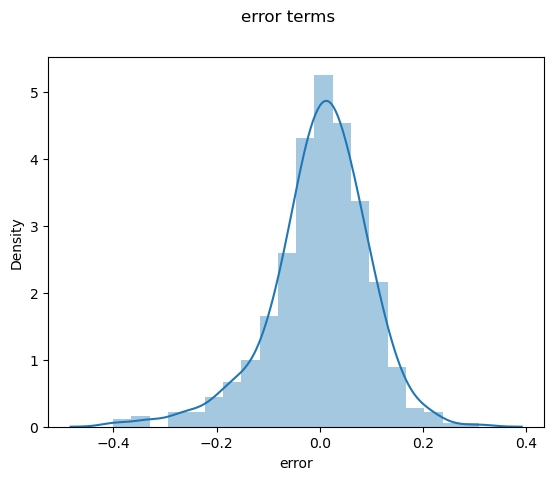

In [155]:
res = y_train - y_train_pred

fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle("error terms")
plt.xlabel("error")

## There is a linear relationship between X and Y

- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## There is No Multicollinearity between the predictor variables

In [157]:
vif6

,features,VIF
1,temp,3.86
2,windspeed,3.51
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.20
6,weekday_6,1.17
8,weathersit_3,1.07


- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## MAKING PREDICTION USING FINAL MODEL
- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

In [161]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

data_test[num_vars] = scaler.transform(data_test[num_vars])

In [162]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [163]:
y_test = data_test.pop('cnt')
X_test = data_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [165]:
col1=X_train_6.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weekday_6     219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [166]:
y_pred = lr6.predict(X_test_lm6)

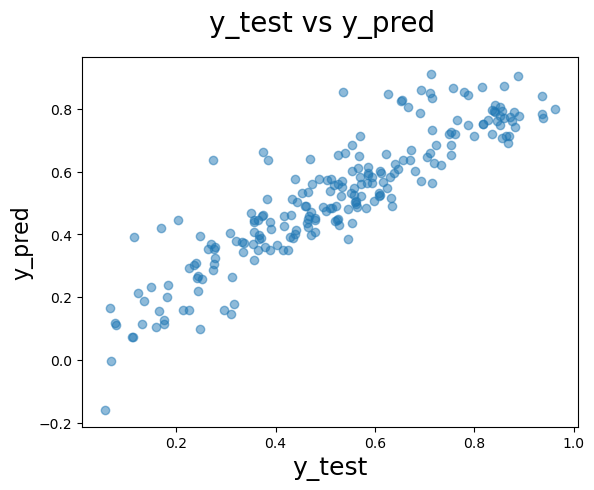

In [167]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R^2 value of test

In [176]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8080916682491797

In [177]:
X_test.shape

(219, 9)

In [182]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7998276731020152

# Final Result Comparison
- Train R^2 :0.824
- Train Adjusted R^2 :0.821
- Test R^2 :0.820
- Test Adjusted R^2 :0.812
- This seems to be a really good model that can very well 'Generalize' various datasets

### As per our final Model, the top 3 predictor variables that influences the bike booking are:
- Temperature (temp) - A coefficient value of ‘0.5634’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5634 units.
- Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3019’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3019 units.
- Year (yr) - A coefficient value of ‘0.2310’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2310 units.
- So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
-  The next best features that can also be considered are:
- season_4: - A coefficient value of ‘0.2310’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.2310 units.
- windspeed: - A coefficient value of ‘-0.1576’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1576 units.

### NOTE:
The details of weathersit_1 & weathersit_3
- weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
- weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- The details of season1 & season4

- season1: spring
- season4: winter